### Exploratory Data Analysis

Our primarly objective here is to understand the data by visualizations.

In [1]:
# import the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings;warnings.filterwarnings('ignore')

# load the dataset
df = pd.read_csv('drug200.csv')

In [2]:
# let's inspect the structure of the data

print(f'Features: \n{df.columns}, \n')
print(f'First 5 rows: \n {df.head()}, \n')
print(f'The shape of the dataset: \n {df.shape} \n')
print(df.info())

Features: 
Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object'), 

First 5 rows: 
    Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY, 

The shape of the dataset: 
 (200, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [3]:
# let's see how many missing values are there
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Good news: the dataset **doesn't contain any missing values**.

This simplifies the analysis process a lot!

In [4]:
# compute descriptive statistics for numerical columns
print(df.describe())

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


In [5]:
# for categorical columns, let's see the frequency counts
columns = ['Sex', 'BP', 'Cholesterol', 'Drug']
for col in columns:
    frequency_counts = df[col].value_counts()
    print("Frequency counts for column '{}':".format(col))
    print(frequency_counts)


Frequency counts for column 'Sex':
Sex
M    104
F     96
Name: count, dtype: int64
Frequency counts for column 'BP':
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
Frequency counts for column 'Cholesterol':
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
Frequency counts for column 'Drug':
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


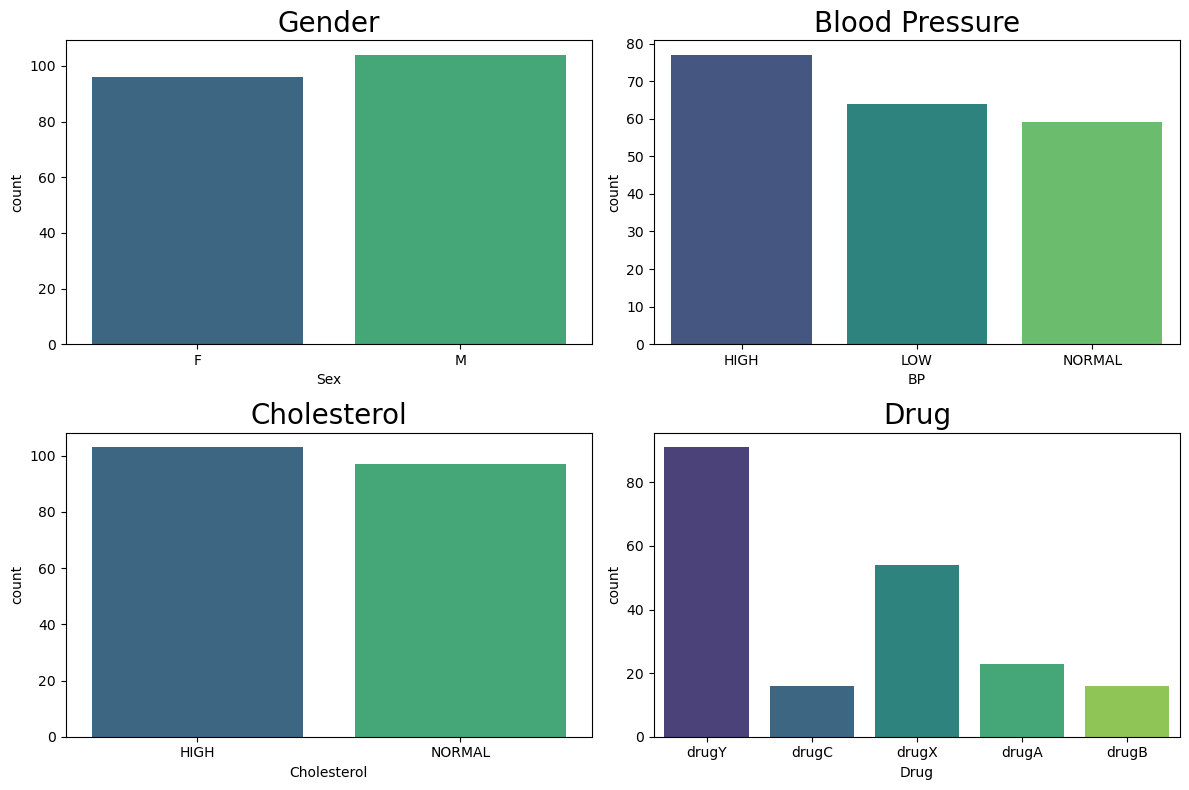

In [6]:
# let's create counterplots 
columns = ['Sex', 'BP', 'Cholesterol', 'Drug']
titles = ['Gender', 'Blood Pressure', 'Cholesterol', 'Drug']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes = axes.flatten()

for i, (col, title) in enumerate(zip(columns, titles)):
    sns.countplot(x=df[col], hue=df[col], palette='viridis', ax=axes[i], legend=False)
    axes[i].set_title(title, size=20)

plt.tight_layout()
plt.show()

**Note** :

- Drug Y occurs **more often**, and that means we may consider using balancing methods, like cross-validation

Honestly, this univariate analysis doesn't show much, so we need to run a bivariate analysis, to see more correlations. 


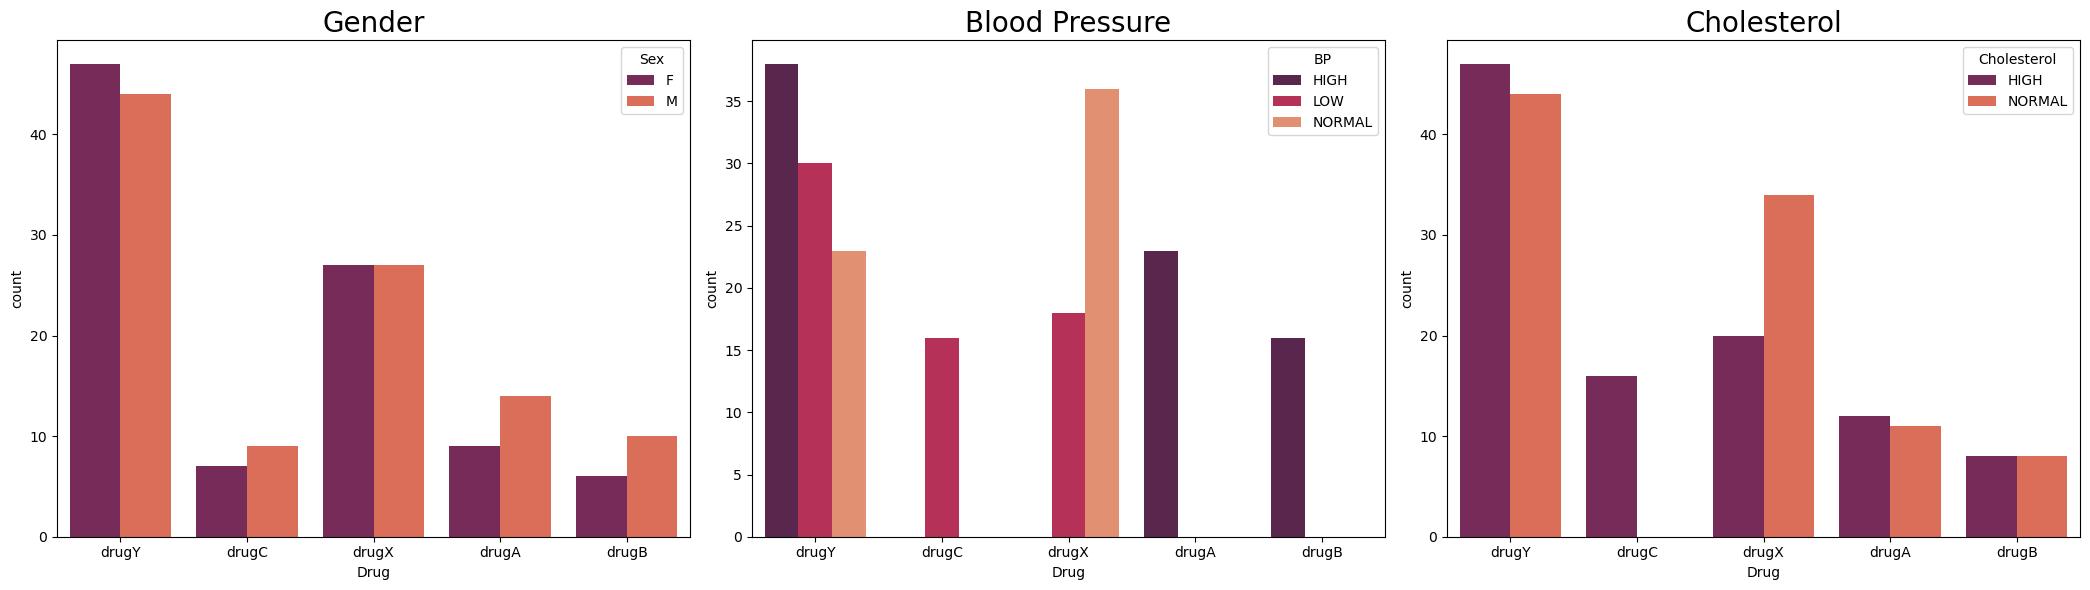

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

variables = ['Sex', 'BP', 'Cholesterol']
titles = ['Gender', 'Blood Pressure', 'Cholesterol']

for i, (var, title) in enumerate(zip(variables, titles)):
    sns.countplot(x='Drug', data=df, hue=var, ax=axes[i], palette='rocket')
    axes[i].set_title(title, size=20)

plt.tight_layout()
plt.show()

### Now we can tell more about the dataset:

- males take more C, A, and B drugs, and females more Y

- drug Y used on all kinds of blood pressure, so that explains the higher occurance

- drug C used only in case of high colesterol, X more with normal, the rest are almost the same 

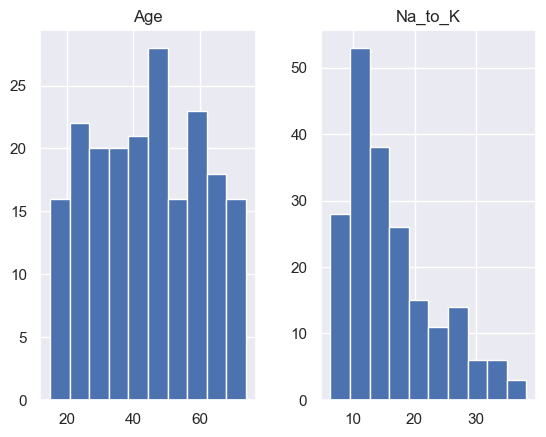

In [8]:
# histogram for numerical features
sns.set_theme()
df.hist()
plt.show()

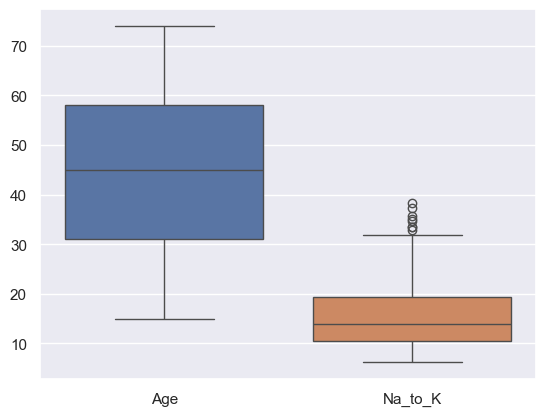

In [9]:
# boxplot for numerical features
sns.boxplot(data=df)
plt.show()

From the **histogram**, we can see some skewness of Na_to_k feature, and from the boxplot, some outliers.

Let's combine this elements to one diagram.

<Axes: xlabel='Na_to_K', ylabel='Density'>

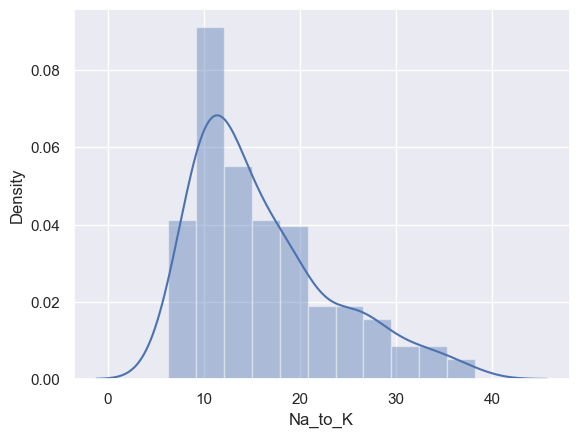

In [10]:
sns.distplot(df['Na_to_K'])

With **log-transformation** we can reduce the skewness of Na_to_K feature by making the distribution more symmetrical.

In [11]:
import numpy as np

<Axes: xlabel='Na_to_K', ylabel='Density'>

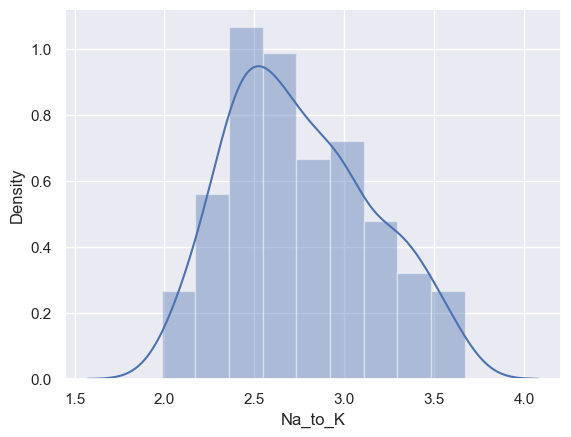

In [12]:
skewed_feature = df['Na_to_K']
transformed_feature = np.log1p(skewed_feature)
df['Na_to_K'] = transformed_feature
sns.distplot(df['Na_to_K'])